# 損失関数の実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2乗和誤差
$\displaystyle L =\frac{1}{2} \sum_{k=1}^K{(y_{k} - t_{k})^2}$  
$L$:損失関数  
$K$:出力層のノード数  
$k$:出力層のノード番号  
$y_k$:ノード$k$の出力値  
$t_k$:ノード$k$の正解値  

### [演習]
* 以下の2乗和誤差関数を完成させましょう

In [2]:
def squared_error(y, t):
    """
    y : 出力値
    t : 正解値
    """    
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 正解データ
t = np.array([0.4, 0.5, 0.6, 0.3, 0.45, 0.55, 0.6, 0.7, 0.8, 0.9])

# 予測データ1
y1 = np.array([0.42, 0.54, 0.62, 0.35, 0.40, 0.5, 0.61, 0.77, 0.81, 0.91])

# 予測データ2
y2 = np.array([0.2, 0.64, 0.52, 0.45, 0.60, 0.7, 0.51, 0.6, 0.71, 0.81])

print(squared_error(y1, t))
print(squared_error(y2, t))

0.007550000000000006
0.08389999999999999


## クロスエントロピー誤差

$\displaystyle L =-\sum_{k}^K{t_k \log y_k}$  
$L$:損失関数  
$K$:出力層のノード数  
$k$:出力層のノード番号  
$y_k$:ノード$k$の出力値(通常は、0と1の間を取る値)  
$t_k$:ノード$k$の正解値(通常は、0or1. つまり$t$はonehotベクトル)  

### [演習]
* 以下のクロスエントロピー誤差関数を完成させましょう。
* delta=1e-7を関数内部で使ってください。

In [4]:
def cross_entropy_error(y, t):
    """
    y : 出力値(通常は、0-1の確率)  
    t : 正解値(通常は、0or1)  
    """
    delta = 1e-7 #固定値
    return -np.sum(t*np.log(y+delta))

### [問]
* cross_enrtropy_error関数におけるdeltaの意味は？

/var/folders/_0/2_dvy_6971dfbf9qw0p9q7lm0000gn/T/ipykernel_87891/487137587.py:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


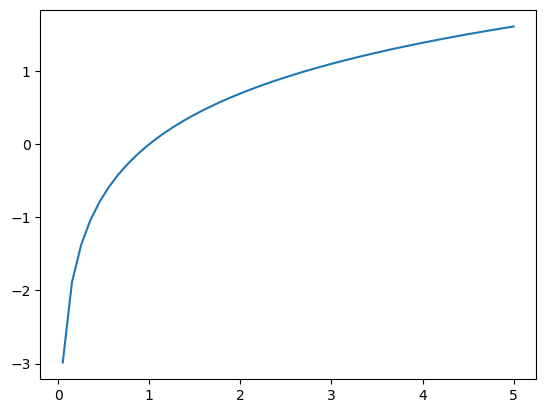

-230.25850929940458


In [5]:
# ヒント：log関数
x = np.linspace(-5,5,100)
y = np.log(x)
plt.plot(x,y)
plt.show()
print(np.log(1e-100))

In [6]:
# 正解データ, onehotベクトル
t = np.array([0, 0, 0, 1, 0, 0]) 

# 予測データ1
y1 = np.array([0.01, 0.02, 0.6, 0.3, 0.03, 0.04])
print("y1の合計=",np.sum(y1))

# 予測データ2
y2 = np.array([0.01, 0.02, 0.3, 0.6, 0.03, 0.04])
print("y2の合計=",np.sum(y2))

print(cross_entropy_error(y1, t))
print(cross_entropy_error(y2, t))

y1の合計= 1.0
y2の合計= 1.0
1.2039724709926583
0.510825457099338


## 2乗和誤差(バッチ対応版)
$\displaystyle L =\frac{1}{N}\sum_n^N \bigl( \frac{1}{2} \sum_k^K{(y_{nk} - t_{nk})^2} \bigr)=\frac{1}{2N}\sum_n^N \sum_k^K{(y_{nk} - t_{nk})^2}$  
$L$:損失関数  
$N$:データ数  
$n$:データ番号  
$K$:出力層のノード数  
$k$:出力層のノード番号  
$y_{nk}$:データ$n$のノード$k$の出力値  
$t_{nk}$:データ$n$のノード$k$の正解値  


### [演習]
* 以下のバッチ対応版2乗和誤差関数を完成させましょう

In [7]:
# ヒント
print(np.mean(np.sum([[1,2,3],[4,5,6],[7,8,9]], axis=1)))
print(np.sum([[1,2,3],[4,5,6],[7,8,9]])/3)

15.0
15.0


In [10]:
def mean_squared_error(y, t):
    """
    y : 出力値
    t : 正解値
    """    
    if y.ndim==1:
        t = t.reshape(1,-1)
        y = y.reshape(1,-1)
        
    batch_size = y.shape[0]
    return 0.5 * np.sum((y - t)**2) / batch_size

In [11]:
# 正解データ
t = np.array([0.4, 0.5, 0.6, 0.3, 0.45, 0.55, 0.6, 0.7, 0.8, 0.9])

# 予測データ1
y1 = np.array([0.42, 0.54, 0.62, 0.35, 0.40, 0.5, 0.61, 0.77, 0.81, 0.91])

# 予測データ2
y2 = np.array([0.2, 0.64, 0.52, 0.45, 0.60, 0.7, 0.51, 0.6, 0.71, 0.81])

# 予測データ1
t_ = np.array([[0.4, 0.5, 0.6, 0.3, 0.45, 0.55, 0.6, 0.7, 0.8, 0.9],
                           [0.4, 0.5, 0.6, 0.3, 0.45, 0.55, 0.6, 0.7, 0.8, 0.9]])
y3 = np.array([[0.42, 0.54, 0.62, 0.35, 0.40, 0.5, 0.61, 0.77, 0.81, 0.91],
                         [0.2, 0.64, 0.52, 0.45, 0.60, 0.7, 0.51, 0.6, 0.71, 0.81]])

print(mean_squared_error(y1, t))
print(mean_squared_error(y2, t))
print(mean_squared_error(y3, t_))

0.007550000000000006
0.08389999999999999
0.045724999999999995


## クロスエントロピー誤差(バッチ対応版)

$\displaystyle L = \frac{1}{N}\sum_n^N \ \bigl(-\sum_k^K{t_{nk} \log y_{nk}} \bigr) = - \frac{1}{N}\sum_n^N \sum_k^K{t_{nk} \log y_{nk}}$  
$L$:損失関数  
$N$:データ数  
$n$:データ番号    
$K$:出力層のノード数  
$k$:出力層のノード番号  
$y_{nk}$:データ$n$のノード$k$の出力値(通常は、0と1の間を取る値)  
$t_{nk}$:データ$n$のノード$k$の正解値(通常は、0or1. つまり$t$はonehotベクトル)  


### [演習]
* 以下のバッチ対応版クロスエントロピー誤差関数を完成させましょう

In [12]:
# ヒント
print(np.sum(np.array([[1,2],[3,4]])))
print(np.array([1,2,3,4]).reshape(1,-1))

10
[[1 2 3 4]]


In [15]:
def cross_entropy_error(y, t):
    """
    y : 出力値(通常は、0-1の確率)  
    t : 正解値(通常は、0or1)  
    """
    if y.ndim==1:
        t = t.reshape(1,-1)
        y = y.reshape(1,-1)
        
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum( t * np.log(y + delta)) / batch_size

In [16]:
# 正解データ, onehotベクトル
t = np.array([0, 0, 0, 1, 0, 0]) 

# 予測データ1
y1 = np.array([0.01, 0.02, 0.6, 0.3, 0.03, 0.04])
print("y1の合計=",np.sum(y1))

# 予測データ2
y2 = np.array([0.01, 0.02, 0.3, 0.6, 0.03, 0.04])
print("y2の合計=",np.sum(y2))

# 予測データ3
t_ = np.array([[0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 1, 0, 0]]) 
y3 = np.array([[0.01, 0.02, 0.6, 0.3, 0.03, 0.04],
                           [0.01, 0.02, 0.3, 0.6, 0.03, 0.04]])
print("y3の合計=",np.sum(y3, axis=1))

print(cross_entropy_error(y1, t))
print(cross_entropy_error(y2, t))
print(cross_entropy_error(y3, t_))

y1の合計= 1.0
y2の合計= 1.0
y3の合計= [1. 1.]
1.2039724709926583
0.510825457099338
0.8573989640459981
